<a href="https://colab.research.google.com/github/glennwanjiru/ebin/blob/main/ebinmodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'garbage-classification-6-classes-775class:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F4215355%2F7328638%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240222%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240222T183240Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D4d73d81d17bccadfdafe86bb82faa4c1c0e93d337b7edf380182021aaf5fff4c1c825d24596e3288526241db9a214d437be9ee6c37ca90d407c05a8121b4f48811026f268610f6ad2c21dc3ac15ce36964239f86ccf9b837fb7ae3c9a962996110949ca545084e47591ab79b3bbf04f600275b0a67dfcc9a945292104daea44149572d79a87ab29fb1c91e225cf8ad5300a47c56adf68a2dbef621dca76d6516916d6243363cf69e1023d7369a1f04eb632fc9cc438213c6ffdc520918f3be2d4c2ba448d388da8870e2884615914450f7e153db3a905d49663af3068c55058540f3d45471dd4c42b0e65d49c6d5d0451cbc18fc102fad28f969ec3b033af28f'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 52632139 bytes downloaded
Downloaded and uncompressed: garbage-classification-6-classes-775class
Data source import complete.


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/garbage-classification-6-classes-775class/metal/metal175.jpg
/kaggle/input/garbage-classification-6-classes-775class/metal/metal287.jpg
/kaggle/input/garbage-classification-6-classes-775class/metal/metal183.jpg
/kaggle/input/garbage-classification-6-classes-775class/metal/metal747.jpg
/kaggle/input/garbage-classification-6-classes-775class/metal/metal383.jpg
/kaggle/input/garbage-classification-6-classes-775class/metal/metal460.jpg
/kaggle/input/garbage-classification-6-classes-775class/metal/metal749.jpg
/kaggle/input/garbage-classification-6-classes-775class/metal/metal283.jpg
/kaggle/input/garbage-classification-6-classes-775class/metal/metal22.jpg
/kaggle/input/garbage-classification-6-classes-775class/metal/metal96.jpg
/kaggle/input/garbage-classification-6-classes-775class/metal/metal599.jpg
/kaggle/input/garbage-classification-6-classes-775class/metal/metal650.jpg
/kaggle/input/garbage-classification-6-classes-775class/metal/metal724.jpg
/kaggle/input/garbage-class

In [3]:
!pip install tensorflow
!pip install numpy
!pip install scipy
!pip install matplotlib

In [4]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
!ls /kaggle/input/garbage-classification-6-classes-775class/

battery  glass	metal  organic	paper  plastic


In [6]:
dataset_path="/kaggle/input/garbage-classification-6-classes-775class/"

In [7]:
# Use ImageDataGenerator to load and preprocess images
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Adjust the validation split as needed
)


In [8]:
# Create a generator for training data
train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),  # Adjust the target size as needed
    batch_size=32,
    class_mode='categorical',  # Adjust the class mode based on your problem
    subset='training'
)


Found 3720 images belonging to 6 classes.


In [9]:
# Create a generator for validation data
val_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 930 images belonging to 6 classes.


In [11]:
num_classes=6

In [12]:

# Define the deeper CNN model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Additional layers
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(512, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(num_classes, activation='softmax'))  # Adjust num_classes based on your problem

In [13]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
try:
    # Train the model
    history = model.fit(train_generator, epochs=50, validation_data=val_generator)
except Exception as e:
    print("Error during model training:", e)
    # Optionally, print more details about the error traceback
    import traceback
    traceback.print_exc()

Epoch 1/50
117/117 [==============================] - 9s 79ms/step - loss: 0.2853 - accuracy: 0.9030 - val_loss: 1.6659 - val_accuracy: 0.5720
Epoch 2/50
117/117 [==============================] - 9s 76ms/step - loss: 0.2711 - accuracy: 0.9016 - val_loss: 1.5359 - val_accuracy: 0.5978
Epoch 3/50
117/117 [==============================] - 9s 79ms/step - loss: 0.2727 - accuracy: 0.9067 - val_loss: 1.3129 - val_accuracy: 0.6183
Epoch 4/50
117/117 [==============================] - 9s 74ms/step - loss: 0.1761 - accuracy: 0.9390 - val_loss: 1.4683 - val_accuracy: 0.6172
Epoch 5/50
117/117 [==============================] - 10s 84ms/step - loss: 0.1543 - accuracy: 0.9435 - val_loss: 1.8646 - val_accuracy: 0.5957
Epoch 6/50
117/117 [==============================] - 9s 80ms/step - loss: 0.1042 - accuracy: 0.9624 - val_loss: 1.8265 - val_accuracy: 0.6215
Epoch 7/50
117/117 [==============================] - 9s 79ms/step - loss: 0.1205 - accuracy: 0.9573 - val_loss: 1.6992 - val_accuracy: 0.637

In [18]:
model.save('/content/exported_model')


In [20]:
from google.colab import files

# Zip the exported model directory
!zip -r /content/exported_model.zip /content/exported_model

# Download the zip file
files.download('/content/exported_model.zip')


updating: content/exported_model/ (stored 0%)
updating: content/exported_model/fingerprint.pb (stored 0%)
updating: content/exported_model/assets/ (stored 0%)
updating: content/exported_model/variables/ (stored 0%)
updating: content/exported_model/variables/variables.data-00000-of-00001 (deflated 28%)
updating: content/exported_model/variables/variables.index (deflated 66%)
updating: content/exported_model/keras_metadata.pb (deflated 93%)
updating: content/exported_model/saved_model.pb (deflated 88%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

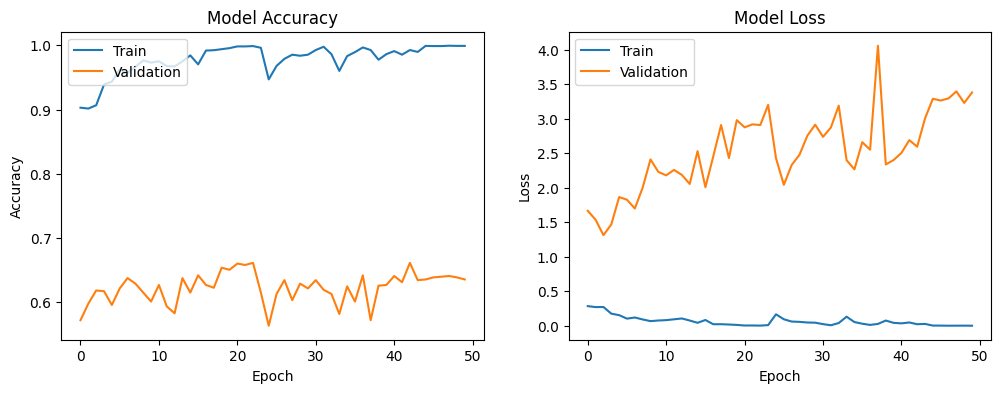

In [21]:
# Plot training history
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [22]:
test_loss, test_accuracy = model.evaluate(val_generator)
print(f'Test Accuracy: {test_accuracy}')

30/30 [==============================] - 2s 62ms/step - loss: 3.3799 - accuracy: 0.6355
Test Accuracy: 0.6354838609695435


In [ ]:
#!pip install streamlit

!streamlit run /content/streamlit_app.py




  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://35.223.85.74:8501

